<a href="https://colab.research.google.com/github/Kscott02/Portfolio/blob/main/Python/F1_Project/DSC326_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DSC326_Spring2025/PythonFolder

/content/drive/MyDrive/DSC326_Spring2025/PythonFolder


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from itertools import product

from sklearn.svm import SVC, SVR

from sklearn.metrics import root_mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification

# 2)

In [ ]:
df = pd.read_csv('f1_churn_dataset_predict.csv', sep = ';')
df.head()

,idDriver,dtRef,dtLastSeen,dtFirstSeen,dtIntervalMaxMin,qtRaces,qtTeams,idTeam,qtLastSeenRace,avgGridPosition,...,pctPolewinRaceLast20,avgGridPositionRaceLast40,medianGridPositionRaceLast40,avgPositionRaceLast40,medianPositionRaceLast40,totalPositionLiftRaceLast40,avgPositionLiftRaceLast40,medianPositionLiftRaceLast40,pctPolePosititionRaceLast40,pctPolewinRaceLast40
0,albon,2025-04-06,2025-04-06,2019-03-17,2212,108,3,williams,0,11.657407,...,0.0,12.100000,13.0,13.025000,12.5,-37,-0.925000,0.0,0.0,0.0
1,alonso,2025-04-06,2025-04-06,2001-03-04,8799,407,6,aston_martin,0,8.653563,...,0.0,9.425000,9.0,10.075000,9.0,-26,-0.650000,0.0,0.0,0.0
2,antonelli,2025-04-06,2025-04-06,2025-03-16,21,3,1,mercedes,0,10.000000,...,0.0,10.000000,8.0,5.333333,6.0,14,4.666667,2.0,0.0,0.0
3,bearman,2025-04-06,2025-04-06,2024-03-09,393,6,2,haas,0,13.833333,...,0.0,13.833333,13.0,10.166667,10.0,22,3.666667,3.5,0.0,0.0
4,bortoleto,2025-04-06,2025-04-06,2025-03-16,21,3,1,sauber,0,17.000000,...,0.0,17.000000,17.0,16.333333,16.0,2,0.666667,-1.0,0.0,0.0


In [ ]:
predictors = ['avgGridPosition', 'avgPosition',	'avgPositionLift', 'pctPolePositition',	'pctPolewin']
target = 'idDriver'
X = df[predictors]  # pandas data frame
y = df[target]      # pandas series

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)

# 3)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4)

# k-NN

In [ ]:
# Perform 10-fold cross-validation to select the best k
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=4, scoring='accuracy')
    overall_accuracy = np.mean(scores)  # Compute mean accuracy
    accuracy_scores.append(overall_accuracy)

In [ ]:
# Find the best k with the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

# Train and evaluate the model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)  # Transform test set using the same scaler
y_pred_test = knn_best.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print results
print(f"Best k: {best_k}")
print(f"Best Accuracy from cross-validation: {best_accuracy:.4f}")
print(f"Test Accuracy with best k: {test_accuracy:.4f}")

Best k: 1
Best Accuracy from cross-validation: 0.9625
Test Accuracy with best k: 0.9500


# MLP

In [ ]:
# Define hyperparameter grid
hidden_layer_options = [1, 2]
hidden_nodes_options = [10, 20, 50, 80]
activation_functions = ['logistic', 'tanh', 'relu']

# Store results
results = []

# Combinations of hyperparameters
prodvalues = product(hidden_layer_options, hidden_nodes_options, activation_functions)
print(list(prodvalues))

[(1, 10, 'logistic'), (1, 10, 'tanh'), (1, 10, 'relu'), (1, 20, 'logistic'), (1, 20, 'tanh'), (1, 20, 'relu'), (1, 50, 'logistic'), (1, 50, 'tanh'), (1, 50, 'relu'), (1, 80, 'logistic'), (1, 80, 'tanh'), (1, 80, 'relu'), (2, 10, 'logistic'), (2, 10, 'tanh'), (2, 10, 'relu'), (2, 20, 'logistic'), (2, 20, 'tanh'), (2, 20, 'relu'), (2, 50, 'logistic'), (2, 50, 'tanh'), (2, 50, 'relu'), (2, 80, 'logistic'), (2, 80, 'tanh'), (2, 80, 'relu')]


In [ ]:
# Perform 5-fold cross-validation for each combination of hyperparameters
for hidden_layer, hidden_nodes, activation in product(hidden_layer_options, hidden_nodes_options, activation_functions):
  mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, activation=activation, random_state=23)

    # Compute accuracy using cross-validation
  accuracy = cross_val_score(mlp, X_train_scaled, y_train, cv=4, scoring='accuracy')
  mean_accuracy = accuracy.mean()

results.append((hidden_layer, hidden_nodes, activation, mean_accuracy))
print(f"hidden_layers: {hidden_layer}, hidden_nodes: {hidden_nodes}, activation_function: {activation}, Mean_Accuracy: {mean_accuracy}")

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

hidden_layers: 2, hidden_nodes: 80, activation_function: relu, Mean_Accuracy: 0.125


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results, columns=["Number of Hidden Layers", "Number of Hidden Nodes", "Activation Function", "Mean Accuracy"])
results_df

,Number of Hidden Layers,Number of Hidden Nodes,Activation Function,Mean Accuracy
0,2,80,relu,0.125


# Support Vector Classifier

In [ ]:
# Define hyperparameter grid
kernel_func_options = ['linear', 'poly', 'rbf']
C_val_options = [0.01, 0.1, 1, 10]

# Store results
results = []

# Combinations of hyperparameters
prodvalues = product(kernel_func_options, C_val_options)
print(list(prodvalues))

[('linear', 0.01), ('linear', 0.1), ('linear', 1), ('linear', 10), ('poly', 0.01), ('poly', 0.1), ('poly', 1), ('poly', 10), ('rbf', 0.01), ('rbf', 0.1), ('rbf', 1), ('rbf', 10)]


In [ ]:
# Perform 5-fold cross-validation for each combination of hyperparameters
for kernel_func, C_val in product(kernel_func_options, C_val_options):
    svc_model = SVC(kernel=kernel_func, C=C_val, random_state=23)

    # Compute accuracy using 5-fold cross-validation on the training set
    cv_scores = cross_val_score(svc_model, X_train_scaled, y_train, cv=4, scoring='accuracy')

    # Compute overall accuracy from cross-validation
    mean_accuracy = np.mean(cv_scores)

    results.append((kernel_func, C_val, mean_accuracy))

    # print kernel_func, C_val and mean_accuracy
    print(f'kernel = {kernel_func}, C = {C_val}: mean accuracy = {mean_accuracy}')

kernel = linear, C = 0.01: mean accuracy = 0.875
kernel = linear, C = 0.1: mean accuracy = 0.8875
kernel = linear, C = 1: mean accuracy = 0.9375
kernel = linear, C = 10: mean accuracy = 0.95
kernel = poly, C = 0.01: mean accuracy = 0.8875
kernel = poly, C = 0.1: mean accuracy = 0.8875
kernel = poly, C = 1: mean accuracy = 0.9125000000000001
kernel = poly, C = 10: mean accuracy = 0.95
kernel = rbf, C = 0.01: mean accuracy = 0.9125000000000001
kernel = rbf, C = 0.1: mean accuracy = 0.9125000000000001
kernel = rbf, C = 1: mean accuracy = 0.9125000000000001
kernel = rbf, C = 10: mean accuracy = 0.9375


In [ ]:
results_df = pd.DataFrame(results, columns=['kernel function', 'C', 'Accuracy'])
results_df

,kernel function,C,Accuracy
0,linear,0.01,0.8750
1,linear,0.10,0.8875
2,linear,1.00,0.9375
3,linear,10.00,0.9500
4,poly,0.01,0.8875
5,poly,0.10,0.8875
6,poly,1.00,0.9125
7,poly,10.00,0.9500
8,rbf,0.01,0.9125
9,rbf,0.10,0.9125


In [ ]:
# Select the best hyperparameter setting
best_kernel_func, best_C_val, best_acc = max(results, key=lambda x: x[2])
print(best_kernel_func, best_C_val, best_acc)

linear 10 0.95


# Random Forest

In [ ]:
# Define hyperparameter grid
num_trees_options = [100, 200]
max_depth_options = [20]
min_samples_leaf_options = [5, 10]

# Store results
results = []

# Combinations of hyperparameters
prodvalues = product(num_trees_options, max_depth_options, min_samples_leaf_options)
print(list(prodvalues))

[(100, 20, 5), (100, 20, 10), (200, 20, 5), (200, 20, 10)]


In [ ]:
# Perform 5-fold cross-validation for each combination of hyperparameters
for num_trees, max_depth, min_samples_leaf in product(num_trees_options, max_depth_options, min_samples_leaf_options):
    # Use RandomForestClassifier for classification tasks
    rf_pruned_clf = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth,
                                             min_samples_leaf=min_samples_leaf, random_state=23)

    # Compute accuracy using cross-validation (suitable for classification)
    accuracy_scores = cross_val_score(rf_pruned_clf, X_train, y_train, cv=4, scoring='accuracy')
    mean_accuracy = np.mean(accuracy_scores)

    results.append((num_trees, max_depth, min_samples_leaf, mean_accuracy))
    print(f"num_trees: {num_trees}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, Accuracy: {mean_accuracy}")

num_trees: 100, max_depth: 20, min_samples_leaf: 5, Accuracy: 0.9125
num_trees: 100, max_depth: 20, min_samples_leaf: 10, Accuracy: 0.85
num_trees: 200, max_depth: 20, min_samples_leaf: 5, Accuracy: 0.8875
num_trees: 200, max_depth: 20, min_samples_leaf: 10, Accuracy: 0.85


In [ ]:
results_df = pd.DataFrame(results, columns=["Number of Trees", "Max Depth", "Min Samples Leaf", "Cross-Validation Accuracy"])
results_df

,Number of Trees,Max Depth,Min Samples Leaf,Cross-Validation Accuracy
0,100,20,5,0.9125
1,100,20,10,0.8500
2,200,20,5,0.8875
3,200,20,10,0.8500


# 5)

# k-NN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predict on training set
y_train_pred = knn.predict(X_train_scaled)
print("Accuracy:", accuracy_score(y_train, y_train_pred))

In [ ]:
# Predict on test set
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


# MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2, 80), activation='relu', max_iter=500, random_state=23)
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 80), max_iter=500, random_state=23)

In [ ]:
# Predict on training set
y_train_pred = mlp.predict(X_train_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print accuracy score on training set
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.7625


In [ ]:
# Predict on test set
y_test_pred = mlp.predict(X_test_scaled)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy score on test set
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7000


# Support Vector Classifier

In [ ]:
# Train final model on the full training set with the best hyperparameters
final_svc_model = SVC(kernel=best_kernel_func, C=best_C_val, random_state=23)
final_svc_model.fit(X_train_scaled, y_train)

SVC(C=10, kernel='linear', random_state=23)

In [ ]:
# Calculate accuracy
train_accuracy = final_svc_model.score(X_train_scaled, y_train)
test_accuracy = final_svc_model.score(X_test_scaled, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9875
Test Accuracy: 0.9


# Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=5, random_state=23)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=23)

In [ ]:
# Predict on both training and test sets
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9
Test accuracy: 0.85


# Logistic Regression

In [ ]:
# initialize the model
log_regression = LogisticRegression(penalty = None)  # no regularization

# fit the model using the training data
log_regression.fit(X_train, y_train)

# Get the coefficients
coefficients = log_regression.coef_

# Get the intercept
intercept = log_regression.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.03051620e+01  2.05239504e+01 -1.02187885e+01 -1.65089506e+01
  -8.39731331e+00]
 [ 2.41528872e+01 -6.88906363e+00  3.10419508e+01  1.31556474e+01
   9.54905716e+00]
 [ 2.67536479e+02 -3.72698526e+02  6.40235005e+02 -5.27758675e+00
  -2.87711371e+00]
 [ 2.69684307e+02 -3.54442286e+02  6.24126593e+02 -7.29246963e+00
  -3.92088266e+00]
 [ 5.24867818e+00  3.49424399e+01 -2.96937618e+01 -1.19186587e+01
  -6.24302600e+00]
 [ 5.17129980e+00  3.53082715e+01 -3.01369717e+01 -1.35681802e+01
  -6.97713275e+00]
 [ 1.18993881e+01  1.76564574e+01 -5.75706934e+00 -1.69851577e+01
  -8.64776995e+00]
 [-3.77077037e+02  2.62837396e+02 -6.39914432e+02 -1.01781595e+01
  -5.13215242e+00]
 [-9.14407173e+01  7.55370006e+01 -1.66977718e+02  8.83816827e+01
   4.86500407e+01]
 [-6.26276797e+01  8.09947440e+01 -1.43622424e+02 -3.29511381e+01
  -1.41197499e+01]
 [ 8.16346177e+01 -5.97260531e+01  1.41360671e+02 -9.86696161e+00
  -4.86656417e+00]
 [-1.17697457e+02  1.10525933e+02 -2.28223390e+02  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# use model to make predictions on the training data
y_train_pred = log_regression.predict(X_train)

# construct the confusion matrix on training data
confusion_matrix_train = pd.crosstab(y_train, y_train_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_train)

Predicted       albon  alonso  antonelli  bearman  bortoleto  doohan  gasly  \
Actual                                                                        
albon               3       0          0        0          0       0      1   
alonso              0       4          0        0          0       0      0   
antonelli           0       0          4        0          0       0      0   
bearman             0       0          0        4          0       0      0   
bortoleto           0       0          0        0          1       3      0   
doohan              0       0          0        0          3       0      0   
gasly               1       0          0        0          0       0      3   
hadjar              0       0          0        0          0       0      0   
hamilton            0       0          0        0          0       0      0   
hulkenberg          0       0          0        0          0       0      0   
lawson              0       0          0        0   

In [ ]:
# accuracy on the training data
metrics.accuracy_score(y_train, y_train_pred)

0.875

In [ ]:
# use model to make predictions on the test data
y_test_pred = log_regression.predict(X_test)

In [ ]:
# construct the confusion matrix on test data
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# accuracy on the test data
metrics.accuracy_score(y_test, y_test_pred)

0.85

# Regression

# 2)

In [ ]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
X = df[['Pop', 'sex', 'hdlngth',	'skullw',	'totlngth',	'taill',	'footlgth',	'earconch',	'eye',	'chest',	'belly']]
y = df['totlngth']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# 3)

In [ ]:
categ_vars = ['Pop', 'sex']
num_vars = ['hdlngth',	'skullw',	'totlngth',	'taill',	'footlgth',	'earconch',	'eye',	'chest',	'belly']

In [ ]:
# show unique values of the categorical variables
for col in categ_vars:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Pop: ['Vic' 'other']
Unique values in sex: ['m' 'f']


In [ ]:
# Apply OneHotEncoder to nominal categorical variables (only on training data)
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit OneHotEncoder on training data and transform training set
X_train_ohe = one_hot_encoder.fit_transform(X_train[categ_vars])

# Convert the one-hot encoded array into DataFrame
ohe_columns = one_hot_encoder.get_feature_names_out(categ_vars)
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)

In [ ]:
# Drop original nominal categorical columns from X_train
X_train.drop(columns=categ_vars, inplace=True)

# Concatenate the one-hot encoded column back to X_train
X_train = pd.concat([X_train, X_train_ohe_df], axis=1)  # axis=1 means column-wise concatenation

In [ ]:
X_train.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
24,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0,0.0,1.0
5,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0,0.0,0.0
20,95.9,58.1,96.5,39.5,77.9,52.9,14.2,30.0,40.0,0.0,0.0
9,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0,0.0,0.0
84,89.5,56.2,92.0,40.5,65.6,43.5,14.5,27.0,31.5,1.0,1.0


In [ ]:
# Apply OneHotEncoder to nominal categorical variables (only on test data)
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit OneHotEncoder on training data and transform training set
X_test_ohe = one_hot_encoder.fit_transform(X_test[categ_vars])

# Convert the one-hot encoded array into DataFrame
ohe_columns = one_hot_encoder.get_feature_names_out(categ_vars)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_vars])
X_train_num = scaler.transform(X_train[num_vars])
X_test_num = scaler.transform(X_test[num_vars])
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [ ]:
X_train_scaled = pd.concat([pd.DataFrame(X_train_num, columns=num_vars, index=X_train.index), X_train_ohe_df], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_num, columns=num_vars, index=X_test.index), X_test_ohe_df], axis=1)

In [ ]:
X_train_scaled.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
24,0.795167,0.397445,0.914904,-0.905796,0.856687,0.820302,-0.135370,1.887744,0.771616,0.0,1.0
5,0.048010,-0.759478,0.682893,-0.905796,1.066299,1.320192,-0.807595,1.386359,-0.295786,0.0,0.0
20,0.822840,0.272372,2.074956,1.219464,2.160938,1.145231,-0.807595,1.386359,2.550620,0.0,0.0
9,-0.311732,0.241104,0.450883,0.156834,0.530624,1.270203,-0.615531,0.132897,-0.295786,0.0,0.0
84,-0.948199,-0.321723,1.030909,1.750779,-0.703757,-1.204254,-0.519498,-0.117795,-0.473686,1.0,1.0


# 4)

# k-NN

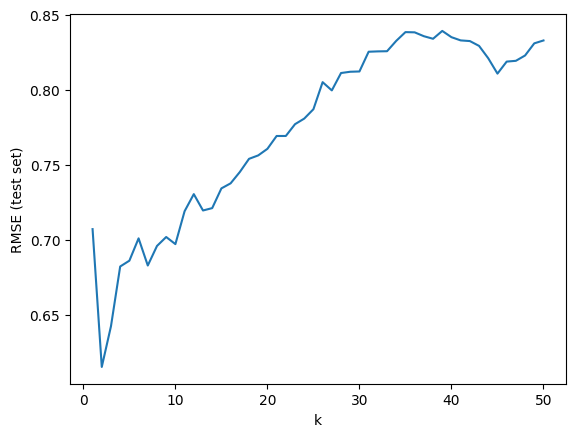

In [ ]:
# calculate RMSE on the test set for
# different values of k
numk = 50
kvalues = np.zeros(numk)
RMSETestSet = np.zeros(numk)
for k in range(1,numk+1):
    kvalues[k-1] = k
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train_scaled, y_train_scaled)
    y_pred = knnreg.predict(X_test_scaled)
    RMSETestSet[k-1] = root_mean_squared_error(y_test_scaled, y_pred)

results_test = pd.concat([pd.Series(kvalues), pd.Series(RMSETestSet)],\
                    axis=1)
results_test.columns = ['k', 'RMSE']

plt.plot(results_test.k, results_test.RMSE)
plt.xlabel("k")
plt.ylabel("RMSE (test set)")
plt.show()

In [ ]:
min_rmse = np.min(RMSETestSet)
min_index = np.argmin(RMSETestSet)

print("Minimum rmse:", min_rmse)
print("Index of minimum value:", min_index)
print("best k:", kvalues[min_index])

Minimum rmse: 0.6150752445640049
Index of minimum value: 1
best k: 2.0


# MLP Regression

In [ ]:
# Define hyperparameter grid
hidden_layer_options = [1, 2]
hidden_nodes_options = [5, 10, 20]
activation_functions = ['logistic', 'relu']

# Store results
results = []

In [ ]:
# Combinations of hyperparameters
prodvalues = product(hidden_layer_options, hidden_nodes_options, activation_functions)
print(list(prodvalues))

[(1, 5, 'logistic'), (1, 5, 'relu'), (1, 10, 'logistic'), (1, 10, 'relu'), (1, 20, 'logistic'), (1, 20, 'relu'), (2, 5, 'logistic'), (2, 5, 'relu'), (2, 10, 'logistic'), (2, 10, 'relu'), (2, 20, 'logistic'), (2, 20, 'relu')]


In [ ]:
# Perform 5-fold cross-validation for each combination of hyperparameters
for layers, nodes, activation in product(hidden_layer_options, hidden_nodes_options, activation_functions):
    hidden_layer_sizes = tuple([nodes] * layers)
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, random_state=23, max_iter=1000)

    # Compute RMSE using cross-validation
    scores = cross_val_score(mlp, X_train_scaled, y_train_scaled, cv=5, scoring='neg_root_mean_squared_error')
    mean_rmse = -np.mean(scores)

    results.append((hidden_layer_sizes, activation, mean_rmse))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conv

In [ ]:
# Select the best hyperparameter setting
best_hidden_layer_sizes, best_activation, best_rmse = min(results, key=lambda x: x[2])
print(best_hidden_layer_sizes, best_activation, best_rmse)

(20, 20) logistic 0.1877838919608239


In [ ]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Hidden Layer Sizes", "Activation Function", "Cross-Validation RMSE"])
results_df

,Hidden Layer Sizes,Activation Function,Cross-Validation RMSE
0,"(5,)",logistic,0.387044
1,"(5,)",relu,0.441102
2,"(10,)",logistic,0.332185
3,"(10,)",relu,0.362679
4,"(20,)",logistic,0.272606
5,"(20,)",relu,0.240872
6,"(5, 5)",logistic,0.383698
7,"(5, 5)",relu,0.394367
8,"(10, 10)",logistic,0.322913
9,"(10, 10)",relu,0.404703


# Random Forest

In [ ]:
# Define hyperparameter grid
num_trees_options = [100, 200]
max_depth_options = [20]
min_samples_leaf_options = [5, 10]

# Store results
results = []

# Combinations of hyperparameters
prodvalues = product(num_trees_options, max_depth_options, min_samples_leaf_options)
print(list(prodvalues))

[(100, 20, 5), (100, 20, 10), (200, 20, 5), (200, 20, 10)]


In [ ]:
# Perform 5-fold cross-validation for each combination of hyperparameters
for num_trees, max_depth, min_samples_leaf in product(num_trees_options, max_depth_options, min_samples_leaf_options):
    rf_pruned_reg = RandomForestRegressor(n_estimators=num_trees, max_depth=max_depth, min_samples_leaf=min_samples_leaf,\
                                          random_state=23)

    # Compute RMSE using cross-validation
    rmse_scores = cross_val_score(rf_pruned_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_rmse = np.sqrt(-np.mean(rmse_scores))  # Correct overall RMSE calculation

    results.append((num_trees, max_depth, min_samples_leaf, mean_rmse))
    print(f"num_trees: {num_trees}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, RMSE: {mean_rmse}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

num_trees: 100, max_depth: 20, min_samples_leaf: 5, RMSE: 1.236763940635429


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

num_trees: 100, max_depth: 20, min_samples_leaf: 10, RMSE: 1.921161691176439


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

num_trees: 200, max_depth: 20, min_samples_leaf: 5, RMSE: 1.2481714479834383


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

num_trees: 200, max_depth: 20, min_samples_leaf: 10, RMSE: 1.9148455781370644


In [ ]:
results_df = pd.DataFrame(results, columns=["Number of Trees", "Max Depth", "Min Samples Leaf", "Cross-Validation RMSE"])
results_df

,Number of Trees,Max Depth,Min Samples Leaf,Cross-Validation RMSE
0,100,20,5,1.236764
1,100,20,10,1.921162
2,200,20,5,1.248171
3,200,20,10,1.914846


In [ ]:
# Select the best hyperparameter setting
best_num_trees, best_max_depth, best_min_samples_leaf, best_rmse = min(results, key=lambda x: x[3])
print(best_num_trees, best_max_depth, best_min_samples_leaf, best_rmse)

100 20 5 1.236763940635429


# Support Vector Regressor

In [ ]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_train_scaled = y_train_scaled.ravel()

In [ ]:
# Set up SVR and hyperparameter grid
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'epsilon': [0.1, 0.5, 1],
    'kernel': ['linear','poly','rbf']
}

In [ ]:
# Perform GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100], 'epsilon': [0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error')

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Fit best model on full training set
best_model.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

In [ ]:
# Predict and inverse transform
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# RMSE calculation
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Best Hyperparameters:", grid_search.best_params_)

Train RMSE: 0.25819515263872
Test RMSE: 0.3128129815167804
Best Hyperparameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}


# 5)

# k-NN

In [ ]:
min_rmse = np.min(RMSETestSet)
min_index = np.argmin(RMSETestSet)

print("Minimum rmse:", min_rmse)
print("Index of minimum value:", min_index)
print("best k:", kvalues[min_index])

Minimum rmse: 0.6150752445640049
Index of minimum value: 1
best k: 2.0


# MLP Regression

In [ ]:
# Train final model on the full training set with the best hyperparameters
final_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes, activation=best_activation, random_state=42, max_iter=1000)
final_model.fit(X_train_scaled, y_train_scaled)

# Evaluate on the test set
y_pred = final_model.predict(X_test_scaled)
test_rmse = root_mean_squared_error(y_test_scaled, y_pred)

print("Test RMSE with best MLP:", test_rmse)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test RMSE with best MLP: 0.608441140673247


# Random Forest

In [ ]:
final_model = RandomForestRegressor(n_estimators=best_num_trees, max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf,\
                                     random_state=23)
final_model.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, random_state=23)

In [ ]:
# Predict on training set
y_train_pred = final_model.predict(X_train_scaled)

# Calculate RMSE on the training set
train_rmse = root_mean_squared_error(y_train_scaled, y_train_pred)

# Print RMSE score on training set
print(f"Training RMSE: {train_rmse:.4f}")

Training RMSE: 0.2148


In [ ]:
# Predict on test set
y_test_pred = final_model.predict(X_test_scaled)

# Calculate RMSE on the test set
test_rmse = root_mean_squared_error(y_test_scaled, y_test_pred)

# Print RMSE score on test set
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.5944


# Support Vector Regressor

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Fit best model on full training set
best_model.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

In [ ]:
# Predict and inverse transform
y_train_pred_scaled = best_model.predict(X_train_scaled)
y_test_pred_scaled = best_model.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# RMSE calculation
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Best Hyperparameters:", grid_search.best_params_)

Train RMSE: 0.25819515263872
Test RMSE: 0.3128129815167804
Best Hyperparameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}


# Multiple Linear Regression

In [ ]:
# Create a linear regression model
lin_model = LinearRegression()

# Fit the model to your training data
lin_model.fit(X_train_scaled, y_train_scaled)

# calculate rmse on training set
y_train_pred = lin_model.predict(X_train_scaled)
train_rmse = root_mean_squared_error(y_train_scaled, y_train_pred)
print("Training RMSE:", train_rmse)

# Make predictions on the test data
y_pred = lin_model.predict(X_test_scaled)

# Evaluate the model's performance
rmse = root_mean_squared_error(y_test_scaled, y_pred)
r2 = lin_model.score(X_train_scaled, y_train_scaled)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Training RMSE: 8.838401598853303e-16
Root Mean Squared Error: 0.5584685018789558
R-squared: 1.0
